In [1]:
%matplotlib inline
import math
import os 
import glob
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as cl
import matplotlib.ticker as mtick
from matplotlib.gridspec import GridSpec
import statsmodels.api as sm
from pandas import ExcelWriter
import pickle
import scipy as sp
from sklearn.metrics import plot_confusion_matrix

In [2]:
def load_object(filename):
    with open(filename, 'rb') as fid:
        file = pickle.load(fid)
    return file

In [3]:
#load the codes
Qian2016codes = load_object('models/revision_3/Qian2016codes_4.pkl')
Qian2018codes = load_object('models/revision_3/Qian2018codes_4.pkl')
QianU2019codes = load_object('models/revision_3/QianU2019codes_4.pkl')
QianR2019codes = load_object('models/revision_3/QianR2019codes_4.pkl')
Sourcecodes = load_object('models/revision_3/Sourcecodes_4.pkl')
Sourcetrainingcodes = load_object('models/revision_3/Sourcesamples_trainingcodes_4.pkl')
Sourcetestingcodes = load_object('models/revision_3/Sourcesamples_testingcodes_4.pkl')

#Load the DFs
Qian2016DF, Qian2016prob, Qian2016keys = load_object('models/revision_3/Qian2016DF_4.pkl')
Qian2018DF, Qian2018prob, Qian2018keys = load_object('models/revision_3/Qian2018DF_4.pkl')
QianU2019DF, QianU2019prob, QianU2019keys = load_object('models/revision_3/QianU2019DF_4.pkl')
QianR2019DF, QianR2019prob, QianR2019keys = load_object('models/revision_3/QianR2019DF_4.pkl')
SourceDF, Sourceprob, Sourcekeys = load_object('models/revision_3/SourceDF_4.pkl')
SourcetrainingDF, Sourcetrainingprob, Sourcekeys = load_object('models/revision_3/SourcetrainingDF_4.pkl')
SourcetestingDF, Sourcetestingprob, Sourcekeys = load_object('models/revision_3/SourcetestingDF_4.pkl')

clustersdata = [Qian2016DF, Qian2018DF, QianU2019DF, QianR2019DF, SourceDF]
probdata = [Qian2016prob, Qian2018prob, QianU2019prob, QianR2019prob, Sourceprob]
airkeys = [Qian2016keys, Qian2018keys, QianU2019keys, QianR2019keys, Sourcekeys]

In [4]:
Train = SourcetrainingDF.iloc[:,:-3]
TrainLabels = SourcetrainingDF['labels']
Test = SourcetestingDF.iloc[:,:-3]
TestLabels = SourcetestingDF['labels']

Train_codes = Sourcetrainingcodes
Test_codes = Sourcetestingcodes

Train_prob = Sourcetrainingprob
Test_prob = Sourcetestingprob

In [5]:
from sklearn.neighbors import KNeighborsClassifier

clf1 = KNeighborsClassifier(n_neighbors = 30, weights = 'distance')

In [6]:
from sklearn.ensemble import GradientBoostingClassifier

clf2 = GradientBoostingClassifier()

#print([clf.score(Test_codes, TestLabels), clf.score(Train_codes, TrainLabels)])

In [7]:
from sklearn.ensemble import VotingClassifier

eclf = VotingClassifier(estimators = [('knn', clf1), ('gbc', clf2)], voting = "soft")

clf1 = clf1.fit(Train_codes, TrainLabels)
clf2 = clf2.fit(Train_codes, TrainLabels)
eclf = eclf.fit(Train_codes, TrainLabels)

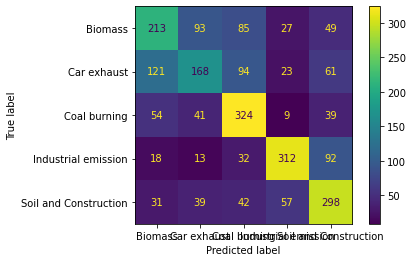

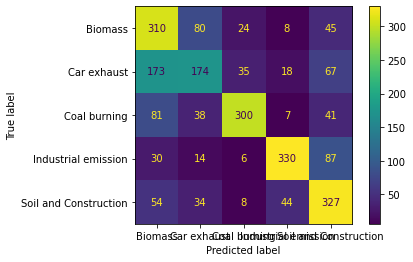

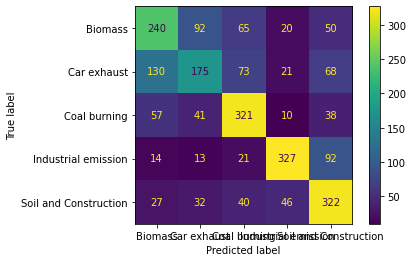

In [8]:
plot_confusion_matrix(clf1, Test_codes, TestLabels)
plot_confusion_matrix(clf2, Test_codes, TestLabels)
plot_confusion_matrix(eclf, Test_codes, TestLabels)

In [10]:
print([clf1.score(Test_codes, TestLabels), clf2.score(Test_codes, TestLabels), eclf.score(Test_codes, TestLabels)])



[0.563169164882227, 0.6171306209850107, 0.5931477516059958]


# Predict on samples

In [11]:
def model_predict(dataset, model, keys):
    Results = model.predict(dataset.iloc[:,:-3])

    Labels = dataset['labels']

    modellist = []
    #for every sample number
    for i in dataset['labels'].unique():
        modellist.append([i, np.unique(np.array(Results[dataset['labels'] == i]), return_counts = True)])

    number = np.arange(0, 13, 1)
    fig = plt.figure(figsize = (12,6), dpi = 300)
    for i, label in enumerate(keys):
        ax = fig.add_subplot(3, 5, i+1)
        ax.pie(modellist[i][1][1]/modellist[i][1][1].sum(), labels = modellist[i][1][0], textprops={'fontsize': 5})
        ax.text(0.5, 0.95, label, transform=ax.transAxes,
                fontsize=5, fontweight='bold', va='top')
    return modellist

def model_predict_codes(dataset, codes, model, keys):
    Results = model.predict(codes)

    Labels = dataset['labels']

    modellist = []
    #for every sample number
    for i in dataset['labels'].unique():
        modellist.append([i, np.unique(np.array(Results[dataset['labels'] == i]), return_counts = True)])

    number = np.arange(0, 13, 1)
    fig = plt.figure(figsize = (12,6), dpi = 300)
    for i, label in enumerate(keys):
        ax = fig.add_subplot(3, 5, i+1)
        ax.pie(modellist[i][1][1]/modellist[i][1][1].sum(), labels = modellist[i][1][0], textprops={'fontsize': 5})
        ax.text(0.5, 0.95, label, transform=ax.transAxes,
                fontsize=5, fontweight='bold', va='top')
    return modellist

<ipython-input-11-ac7783ecd1db>:34: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  ax.pie(modellist[i][1][1]/modellist[i][1][1].sum(), labels = modellist[i][1][0], textprops={'fontsize': 5})


[['Q16_12_10',
  (array(['Biomass', 'Car exhaust', 'Coal burning', 'Industrial emission',
          'Soil and Construction'], dtype=object),
   array([104, 219, 720, 361, 645], dtype=int64))],
 ['Q16_12_11',
  (array(['Biomass', 'Car exhaust', 'Coal burning', 'Industrial emission',
          'Soil and Construction'], dtype=object),
   array([ 237,  483, 1943, 1955, 2107], dtype=int64))],
 ['Q16_12_12',
  (array(['Biomass', 'Car exhaust', 'Coal burning', 'Industrial emission',
          'Soil and Construction'], dtype=object),
   array([ 181,  310,  723,  976, 1348], dtype=int64))],
 ['Q16_12_13',
  (array(['Biomass', 'Car exhaust', 'Coal burning', 'Industrial emission',
          'Soil and Construction'], dtype=object),
   array([106, 194, 345, 334, 749], dtype=int64))],
 ['Q16_12_14',
  (array(['Biomass', 'Car exhaust', 'Coal burning', 'Industrial emission',
          'Soil and Construction'], dtype=object),
   array([ 88, 194, 395, 286, 581], dtype=int64))],
 ['Q16_12_15',
  (array([

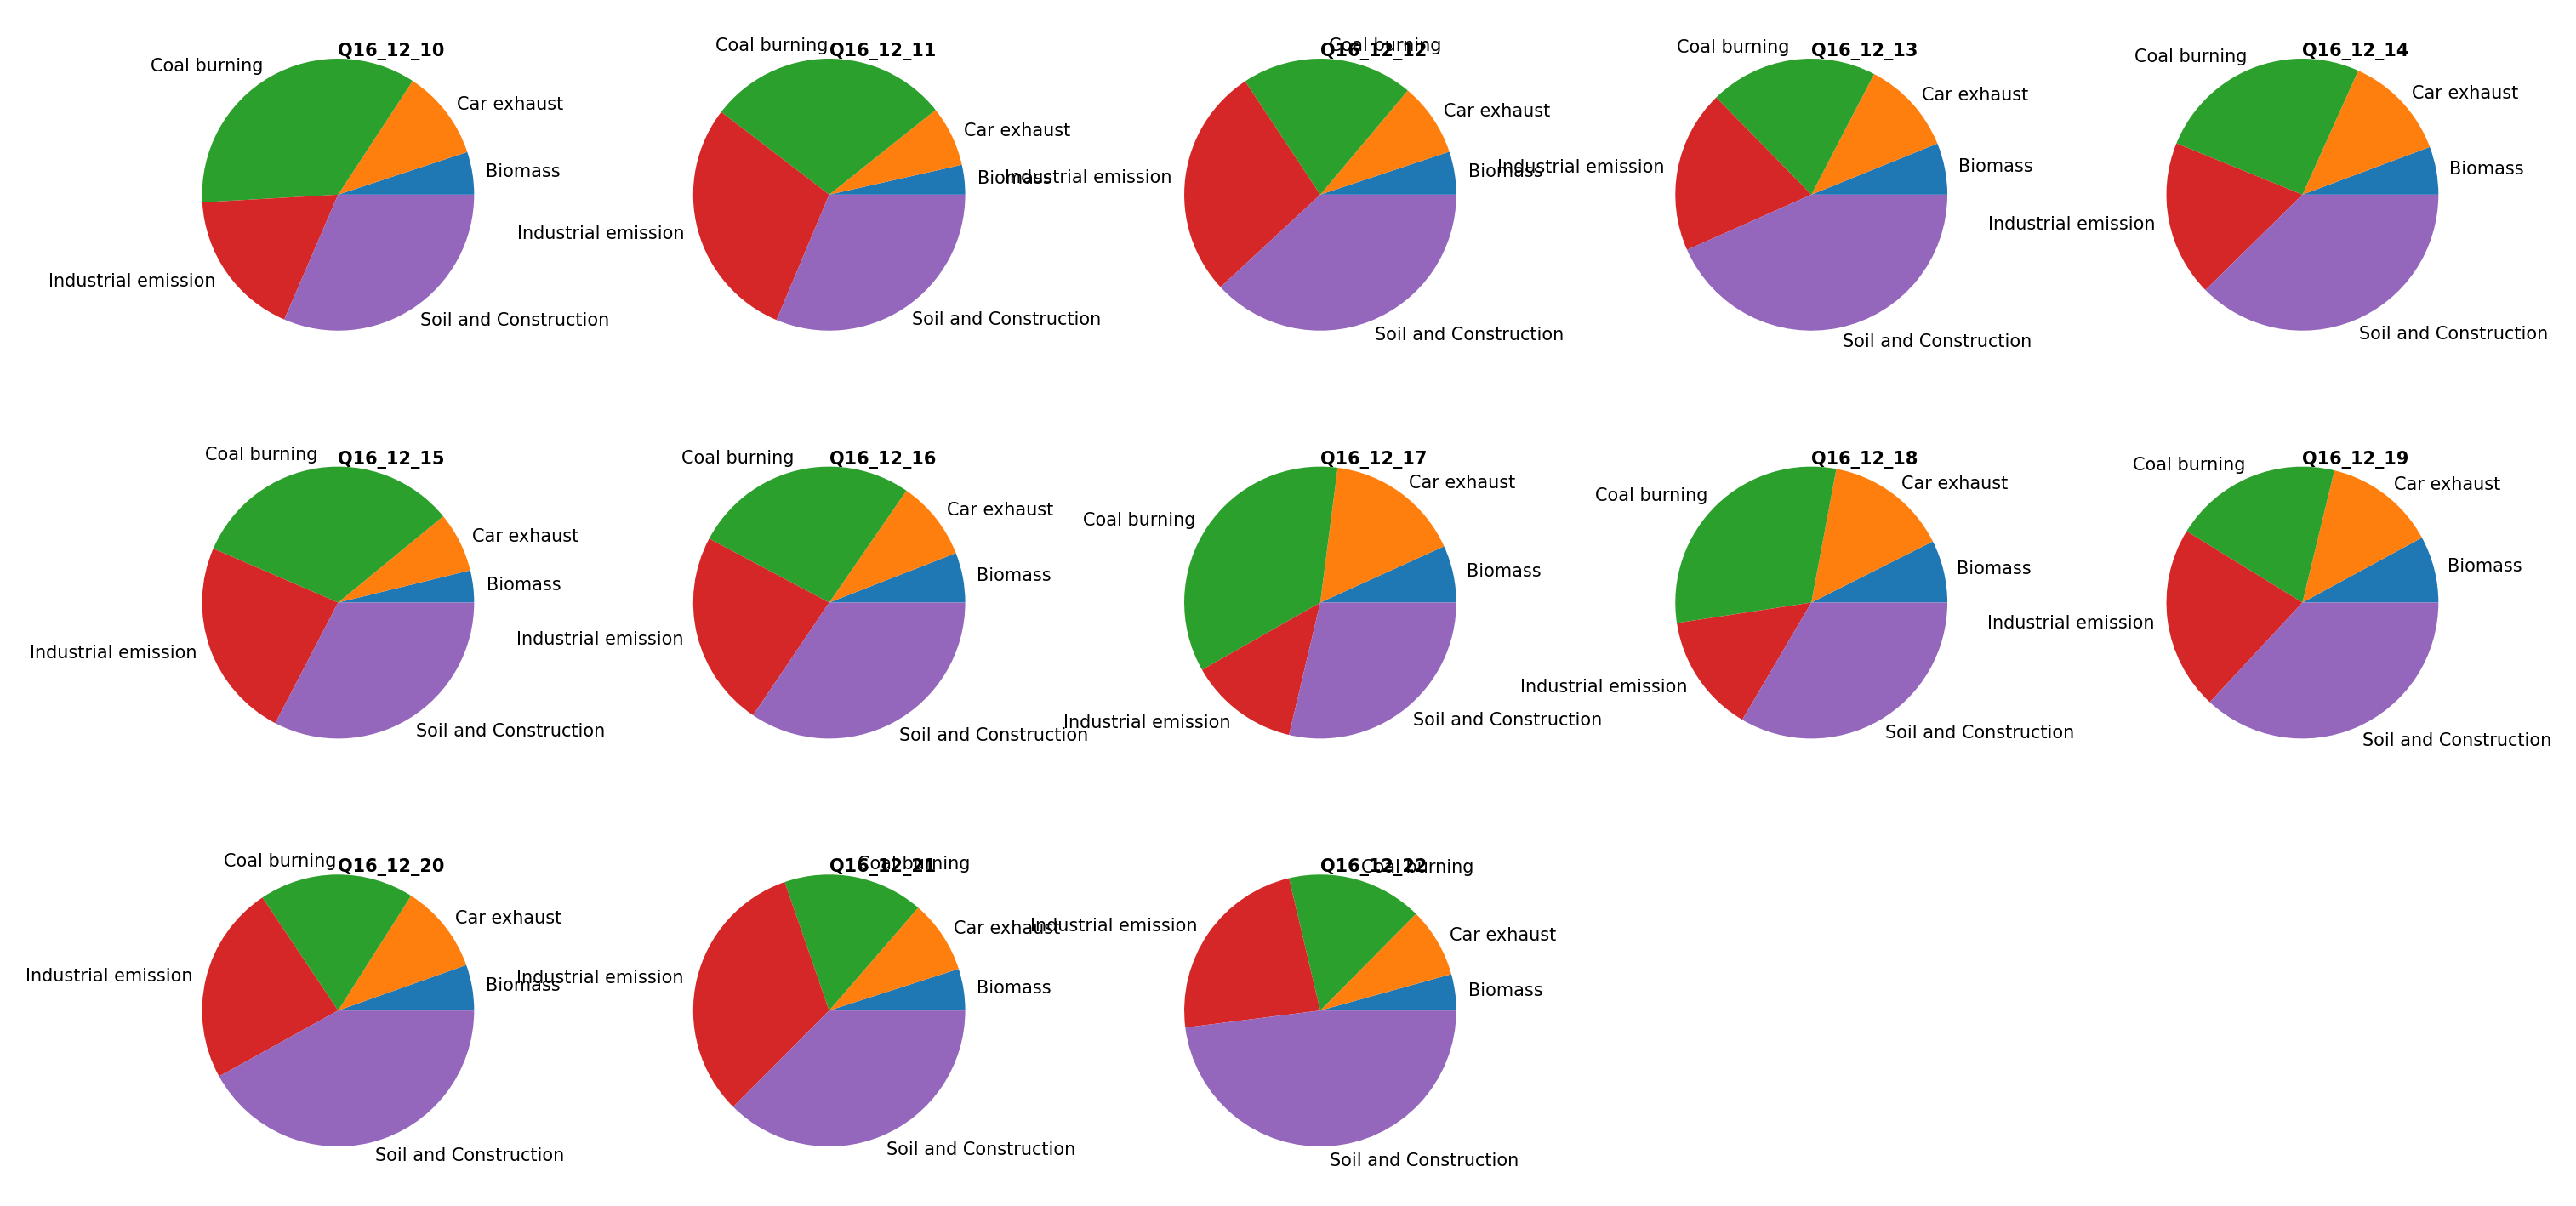

In [12]:
model_predict_codes(Qian2016DF, Qian2016codes, clf1, Qian2016keys)

[['Q16_12_10',
  (array(['Biomass', 'Car exhaust', 'Coal burning', 'Industrial emission',
          'Soil and Construction'], dtype=object),
   array([137, 188, 662, 336, 726], dtype=int64))],
 ['Q16_12_11',
  (array(['Biomass', 'Car exhaust', 'Coal burning', 'Industrial emission',
          'Soil and Construction'], dtype=object),
   array([ 418,  493, 1492, 2422, 1900], dtype=int64))],
 ['Q16_12_12',
  (array(['Biomass', 'Car exhaust', 'Coal burning', 'Industrial emission',
          'Soil and Construction'], dtype=object),
   array([ 255,  293,  532, 1125, 1333], dtype=int64))],
 ['Q16_12_13',
  (array(['Biomass', 'Car exhaust', 'Coal burning', 'Industrial emission',
          'Soil and Construction'], dtype=object),
   array([126, 165, 265, 374, 798], dtype=int64))],
 ['Q16_12_14',
  (array(['Biomass', 'Car exhaust', 'Coal burning', 'Industrial emission',
          'Soil and Construction'], dtype=object),
   array([110, 177, 316, 294, 647], dtype=int64))],
 ['Q16_12_15',
  (array([

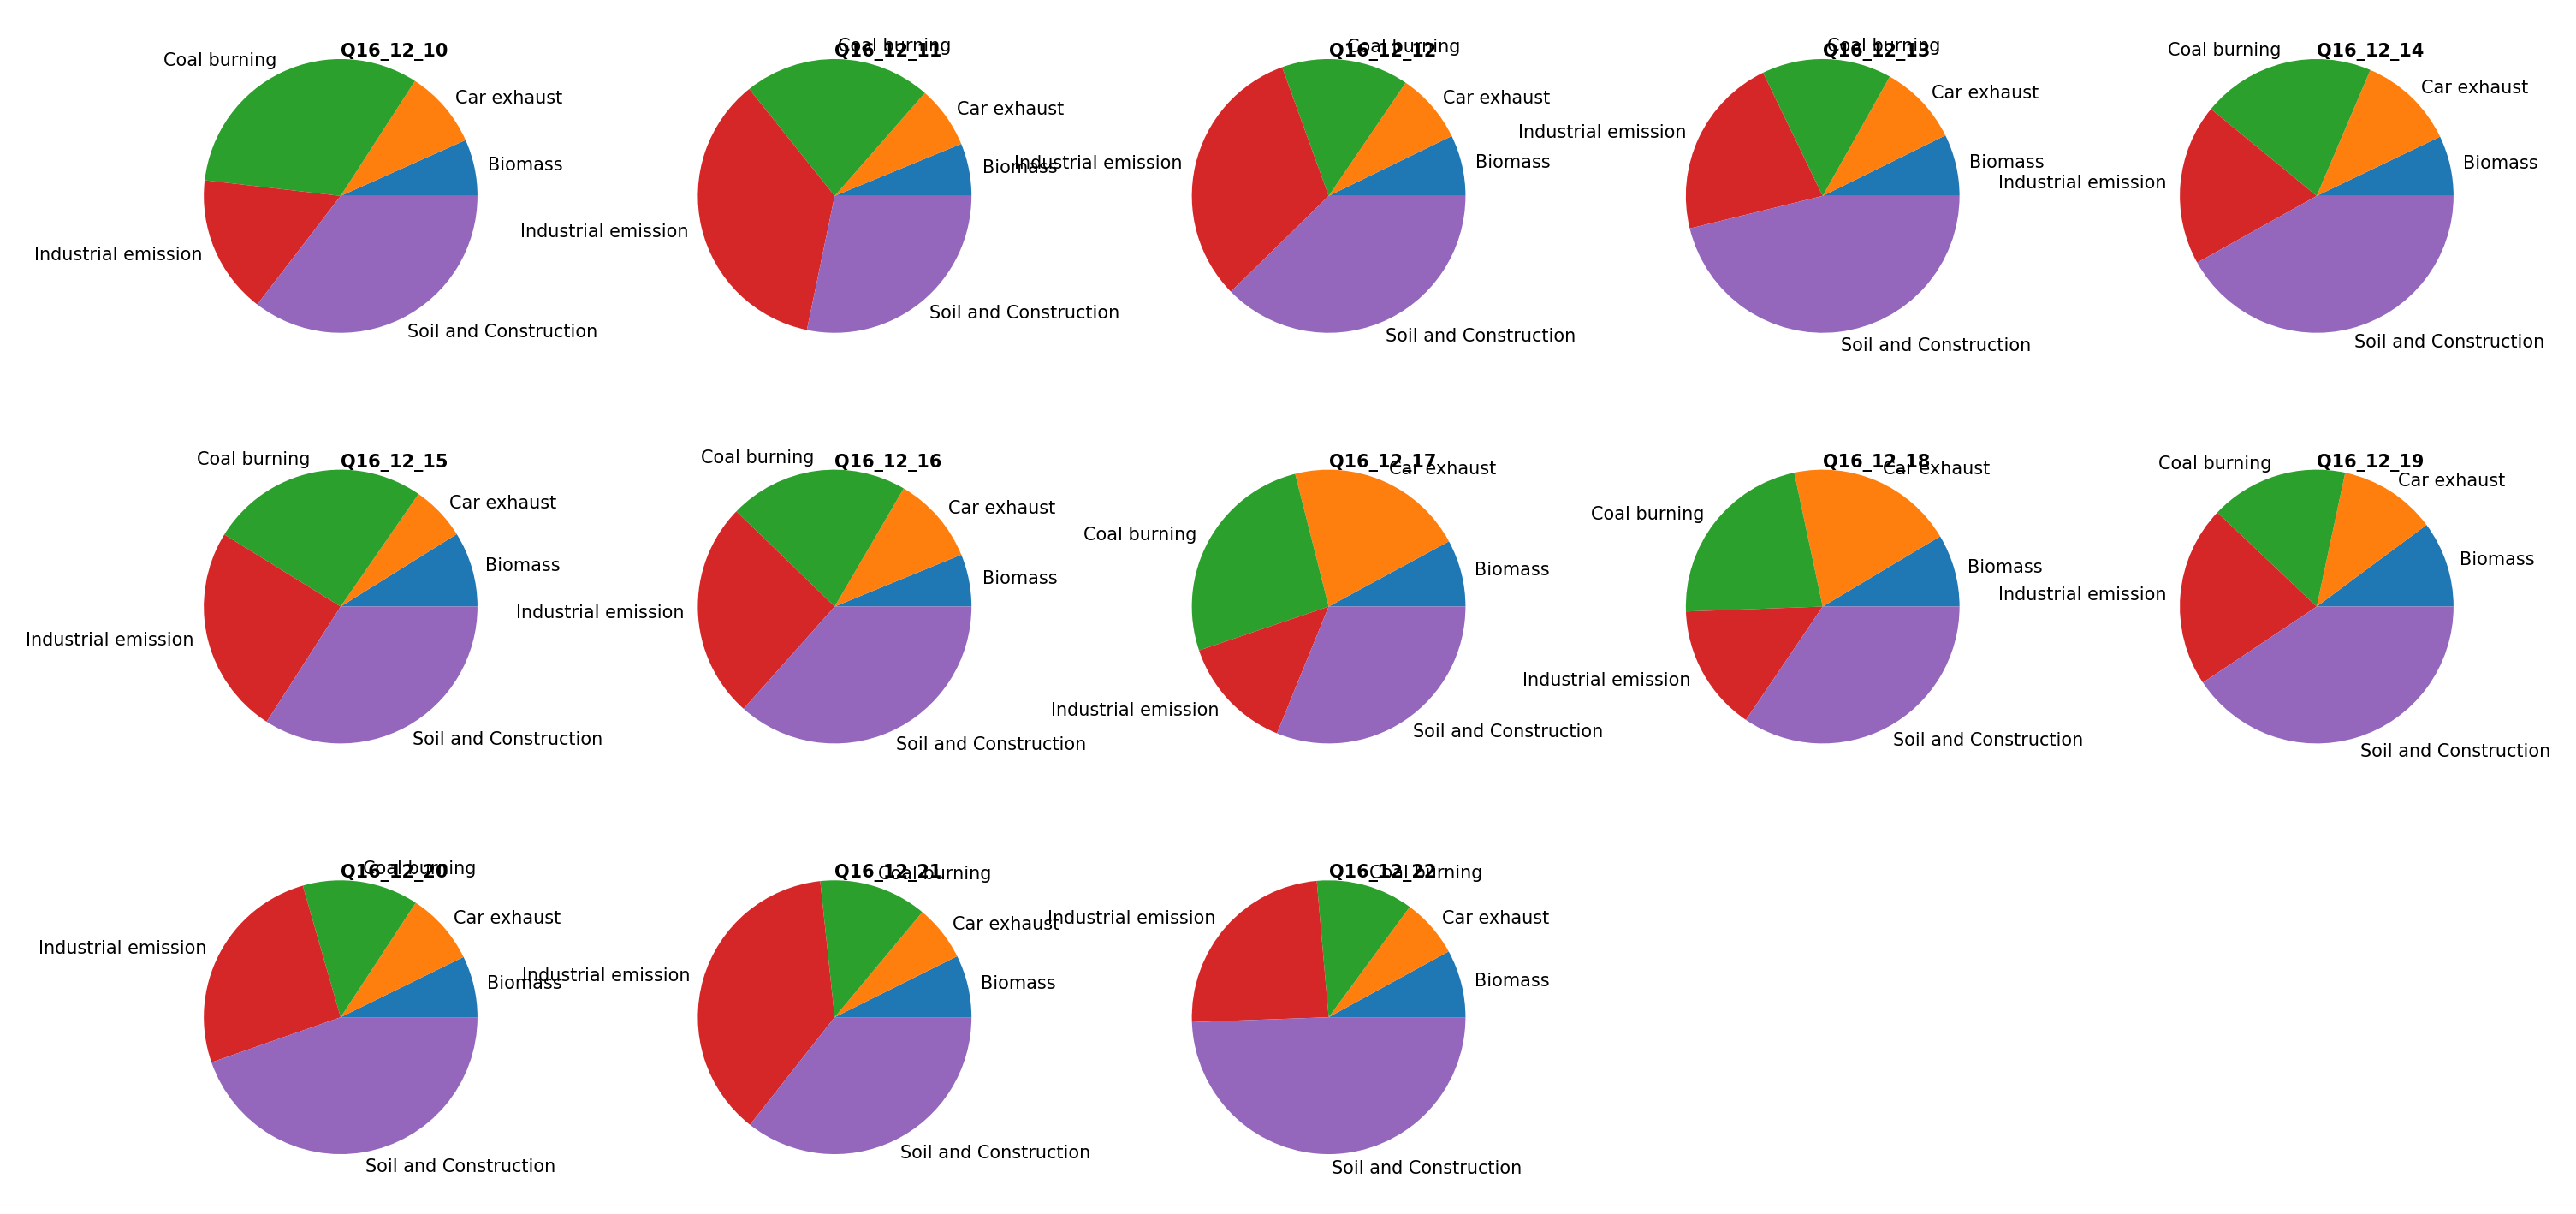

In [13]:
model_predict_codes(Qian2016DF, Qian2016codes, clf2, Qian2016keys)

[['Q16_12_10',
  (array(['Biomass', 'Car exhaust', 'Coal burning', 'Industrial emission',
          'Soil and Construction'], dtype=object),
   array([102, 184, 722, 350, 691], dtype=int64))],
 ['Q16_12_11',
  (array(['Biomass', 'Car exhaust', 'Coal burning', 'Industrial emission',
          'Soil and Construction'], dtype=object),
   array([ 218,  418, 1916, 2002, 2171], dtype=int64))],
 ['Q16_12_12',
  (array(['Biomass', 'Car exhaust', 'Coal burning', 'Industrial emission',
          'Soil and Construction'], dtype=object),
   array([ 168,  256,  723,  999, 1392], dtype=int64))],
 ['Q16_12_13',
  (array(['Biomass', 'Car exhaust', 'Coal burning', 'Industrial emission',
          'Soil and Construction'], dtype=object),
   array([ 94, 162, 332, 331, 809], dtype=int64))],
 ['Q16_12_14',
  (array(['Biomass', 'Car exhaust', 'Coal burning', 'Industrial emission',
          'Soil and Construction'], dtype=object),
   array([ 87, 163, 375, 283, 636], dtype=int64))],
 ['Q16_12_15',
  (array([

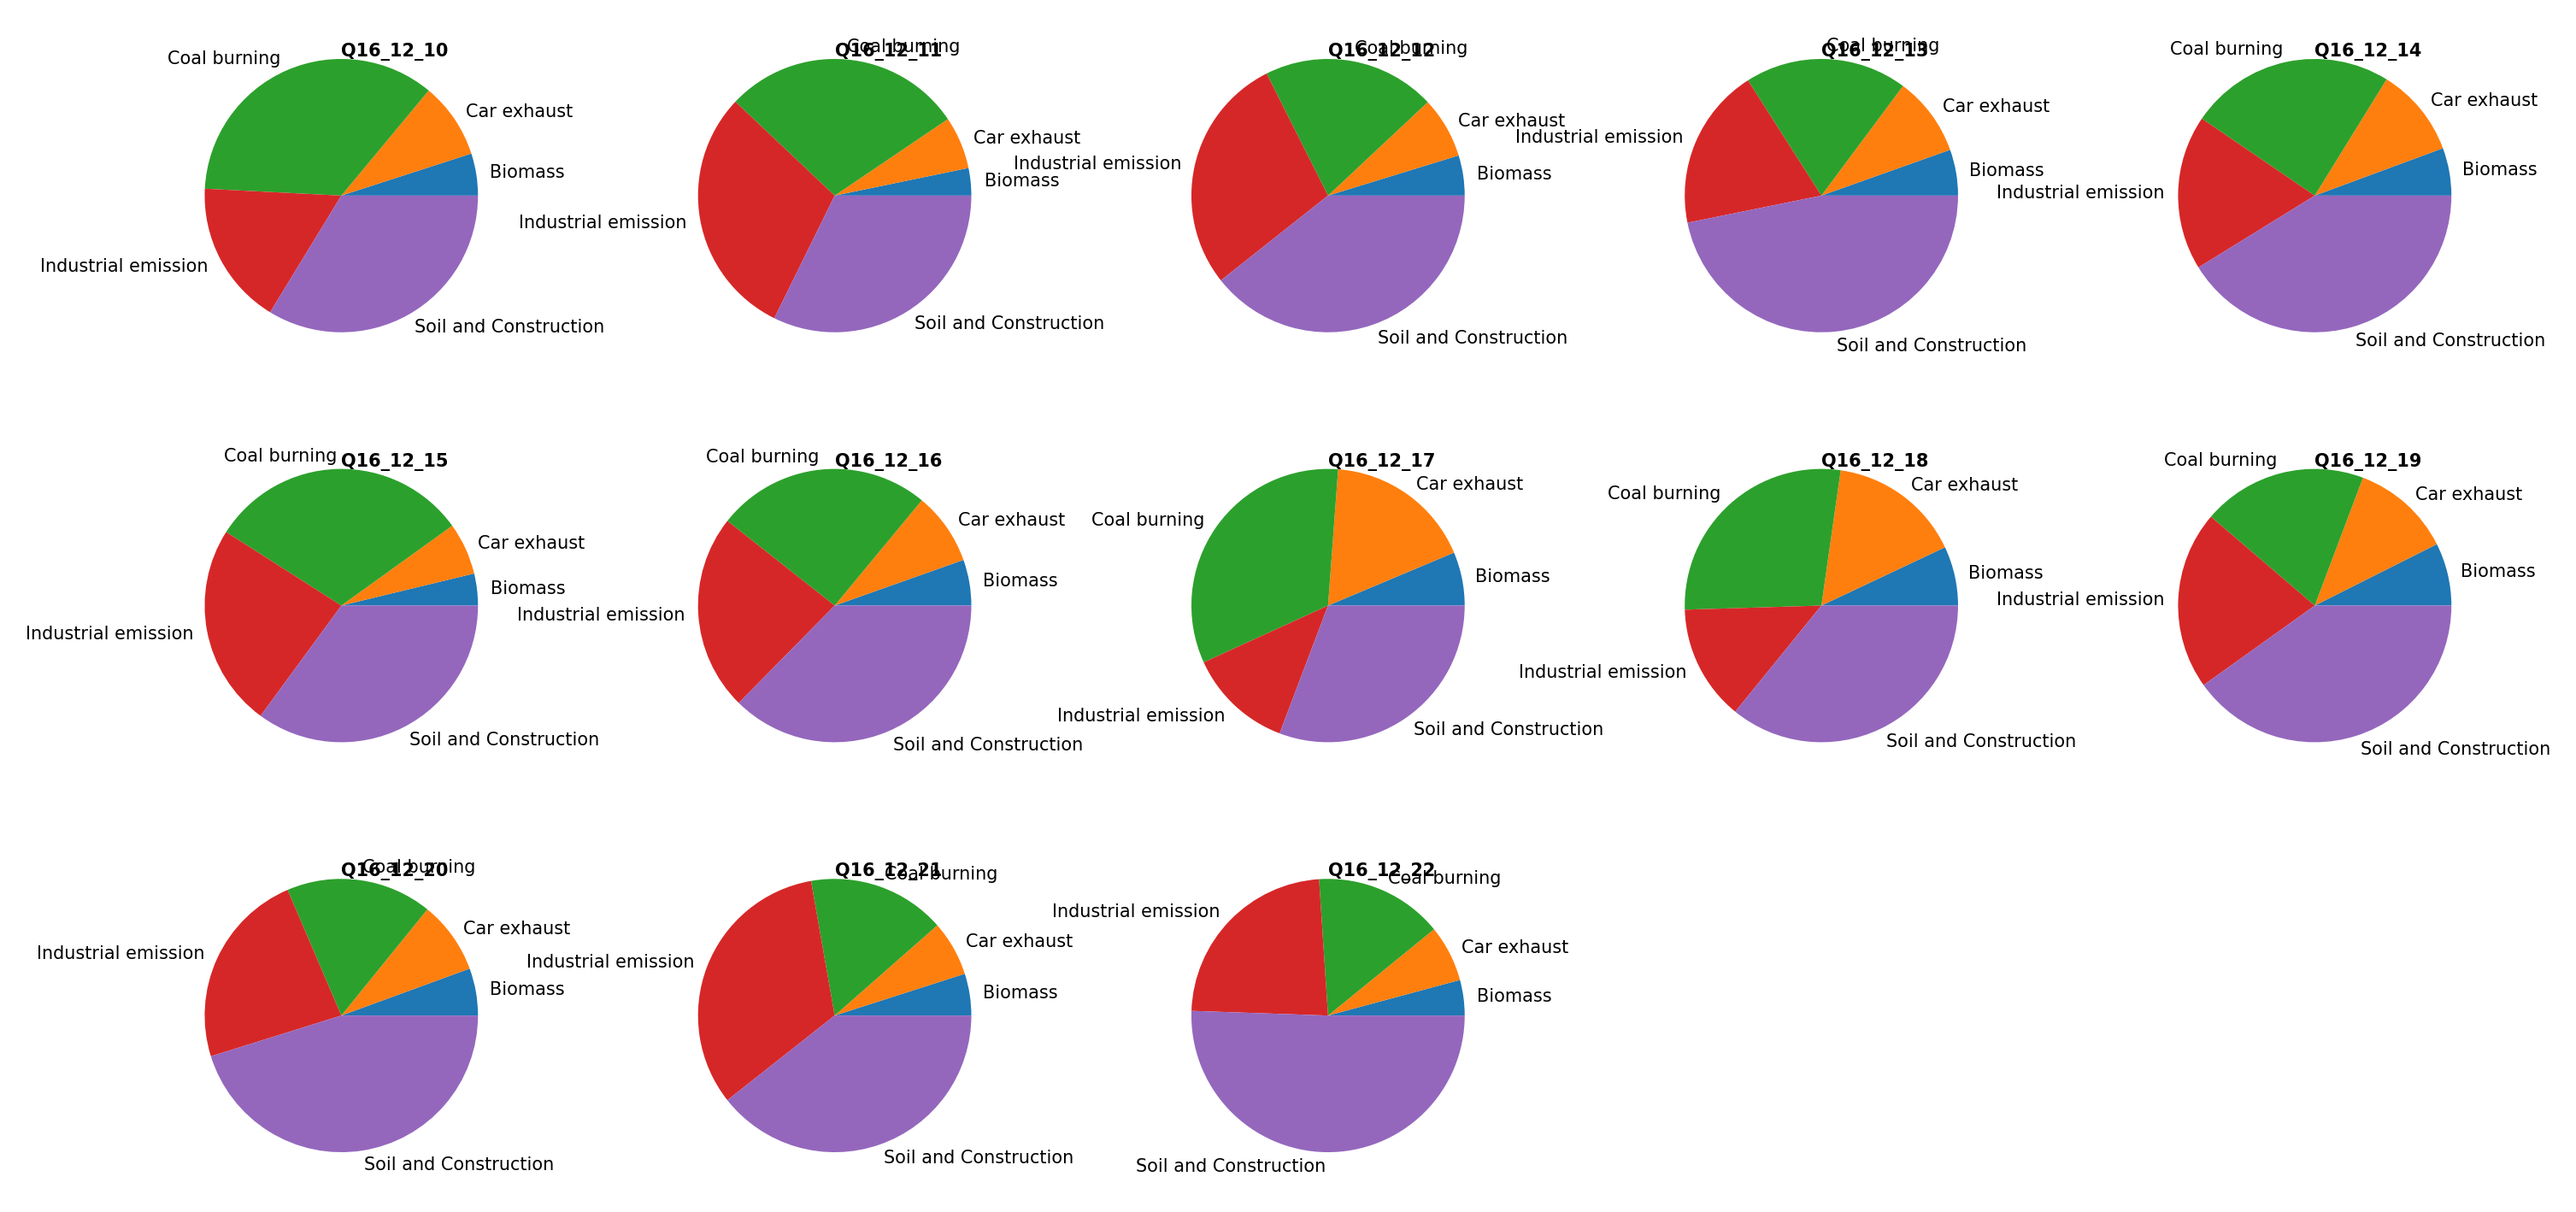

In [14]:
model_predict_codes(Qian2016DF, Qian2016codes, eclf, Qian2016keys)